GLOBAL POWER PLANT CASE STUDY

Dataset description-
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Objective- To make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [140]:
#Reading data set
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [141]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
#Checking random samples
data.sample(15)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
855,IND,India,UPPER SINDH I& II,IND0000484,105.00,34.1980,75.1245,Hydro,NaN,NaN,...,2019.0,NaN,301.80340,257.058250,361.095450,325.60380,304.440150,NaN,Central Electricity Authority,NaN
815,IND,India,TROMBAY WORKS,WRI1019991,18.00,19.0366,72.8892,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,IND,India,CHIBRO (YAMUNA),IND0000082,240.00,30.5559,77.7915,Hydro,NaN,NaN,...,2019.0,NaN,867.73950,809.711100,710.430000,779.65215,805.482350,NaN,Central Electricity Authority,NaN
475,IND,India,METTUR DAM,IND0000266,250.00,11.8014,77.8085,Hydro,NaN,NaN,...,2019.0,NaN,440.40690,339.722850,124.852600,214.48220,585.607250,NaN,Central Electricity Authority,NaN
296,IND,India,JORETHANG LOOP,IND0000161,96.00,27.1598,88.2924,Hydro,NaN,NaN,...,2019.0,NaN,NaN,74.684700,403.601850,403.97995,407.701250,NaN,Central Electricity Authority,NaN
201,IND,India,E.G. CANAL,IND0000110,15.00,NaN,NaN,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,IND,India,BANDEL,IND0000027,335.00,22.9956,88.4042,Coal,Oil,NaN,...,2019.0,NaN,946.14100,948.831000,1668.631000,1713.20100,1166.342000,NaN,Central Electricity Authority,NaN
734,IND,India,SRINAGAR,IND0000422,330.00,30.2313,78.7924,Hydro,NaN,NaN,...,2019.0,NaN,NaN,896.863150,1274.346250,1375.62730,1368.433450,NaN,Central Electricity Authority,NaN
130,IND,India,Bitta Solar Power Plant,WRI1026125,40.00,23.2579,69.0255,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,IND,India,RAJPURA TPP,IND0000362,1400.00,30.5570,76.5770,Coal,Oil,NaN,...,2019.0,NaN,5373.91000,7262.500572,8952.470000,8647.43000,8658.170000,NaN,Central Electricity Authority,NaN


In [7]:
#Checking shape of datsa
data.shape

(907, 27)

In [8]:
#Checking data type and nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Columns like country_long, country, name, gppd_idnr, primary_fuel,other_fuel1, other_fuel2, owner, source, url, geolocation_source and generation_data_source have object type data and the remaining columns either have int or float data. 
A lot of columns have null values as well

In [10]:
#Checking for exact number of nulls for each variable
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Observations-

1. Variables like other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and estimated_generation_gwh have all the values missing and other_fuel2 has a single value present. Since there is significant nulls in these columns, these variables should be eliminated.

2. Dataset has mixed data type, some with object(categorical) data type and some with float data(numerical).

3. Unique Identifiers The gppd_idnr column serves as a unique identifier for each power plant.

4.Addressing missing values, data preprocessing, and feature engineering will be essential before building machine learning models for predicting primary fuel and capacity.

In [142]:
#Let's drop irrelevant columns-
data.drop(columns=['country','other_fuel3', 'wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], axis=1,inplace=True)

In [143]:
data.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [15]:
data['country_long'].unique()

array(['India'], dtype=object)

In [144]:
data.drop(columns=['country_long','url'], axis=1, inplace=True)

In [145]:
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [19]:
data['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [12]:
#Checking unique values for the label- primary_fuel
data['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [20]:
data['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [21]:
data['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [35]:
data['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [28]:
data['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [29]:
data['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [146]:
data.drop(columns=['generation_data_source','other_fuel2'], axis=1, inplace=True)

In [100]:
data.shape

(907, 17)

In [62]:
#Gaining more insights about data
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Observations-

1. There are still a lot of variables that have missing values

2. The range of standard deviation lies between 21 to 2600 which means that the scale of distribution varies a lot.

3. Variables like capacity_mw, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2014 have huge difference between 75% and max which indicates presence of outliers

In [63]:
data.dtypes

name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

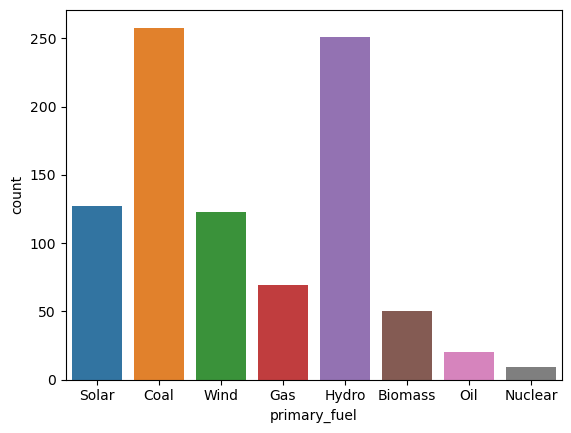

In [26]:
#Let's check the distribution of classes in primary_fuel-
sns.countplot(x='primary_fuel', data=data)
plt.show()

The number of plants using Coal and Hydrofuel as their primary fuel is much higher than all other fuels.

Oil and Nuclear are least used primary fuels

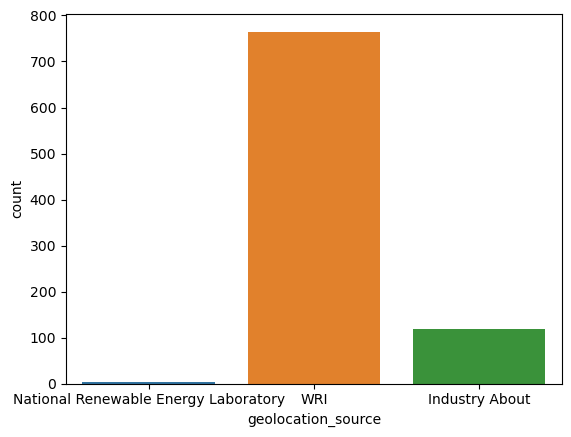

In [27]:
#Let's check the distribution in geolocation_source-
sns.countplot(x='geolocation_source', data=data)
plt.show()

Most of the plants fall under WRI location source and count of plants in National Renewable Energy is the lowest

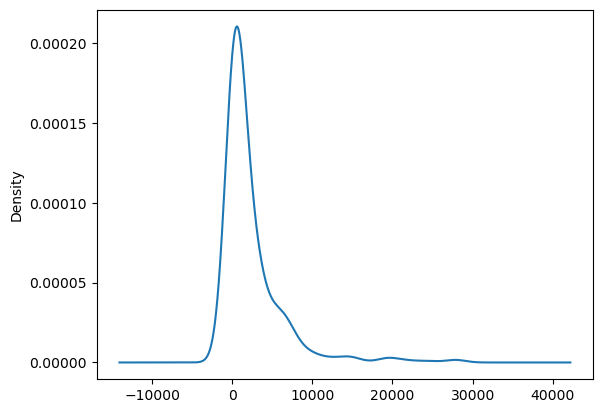

In [36]:
#Let's check range of electricity generated yearwise
data["generation_gwh_2014"].plot(kind='density')
plt.show()

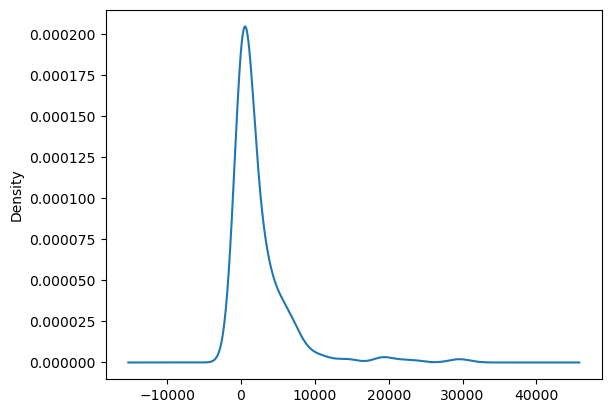

In [37]:
#Let's check range of electricity generated yearwise
data["generation_gwh_2015"].plot(kind='density')
plt.show()

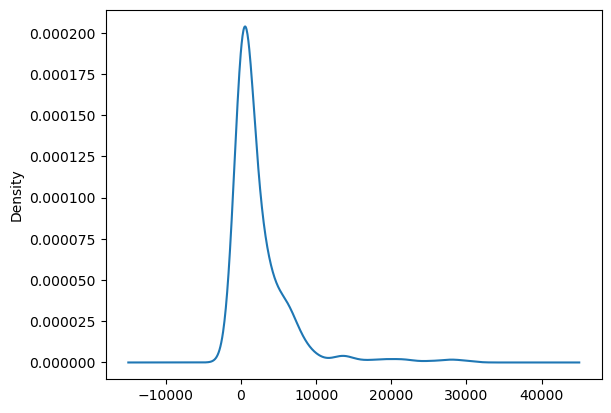

In [38]:
#Let's check range of electricity generated yearwise
data["generation_gwh_2016"].plot(kind='density')
plt.show()

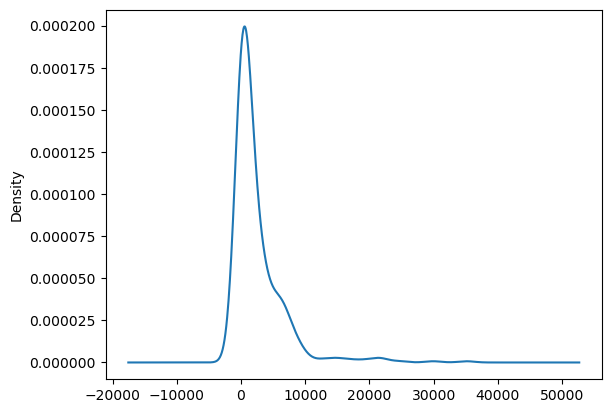

In [39]:
#Let's check range of electricity generated yearwise
data["generation_gwh_2017"].plot(kind='density')
plt.show()

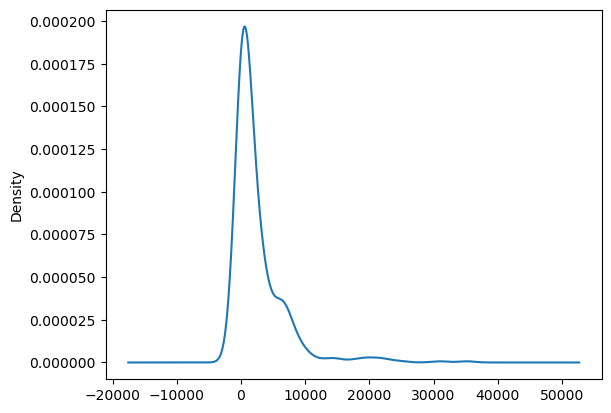

In [40]:
#Let's check range of electricity generated yearwise
data["generation_gwh_2018"].plot(kind='density')
plt.show()

In [101]:
data.isnull().sum()


name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    565
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [147]:
#Handling null values-
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mean())
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())
data['other_fuel1']=data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])
data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])


In [148]:
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [149]:
#Converting object type data to int-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [150]:
data.dtypes

name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [151]:
data.drop(columns=['name','year_of_capacity_data','gppd_idnr'], axis=1, inplace=True)

In [152]:
data.shape

(907, 14)

In [153]:
list=['primary_fuel','other_fuel1','owner','source','geolocation_source']

In [154]:
for i in list:
    data[i]=le.fit_transform(data[i])

In [155]:
data.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
commissioning_year     float64
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

We have taken care of the missing values and object type data

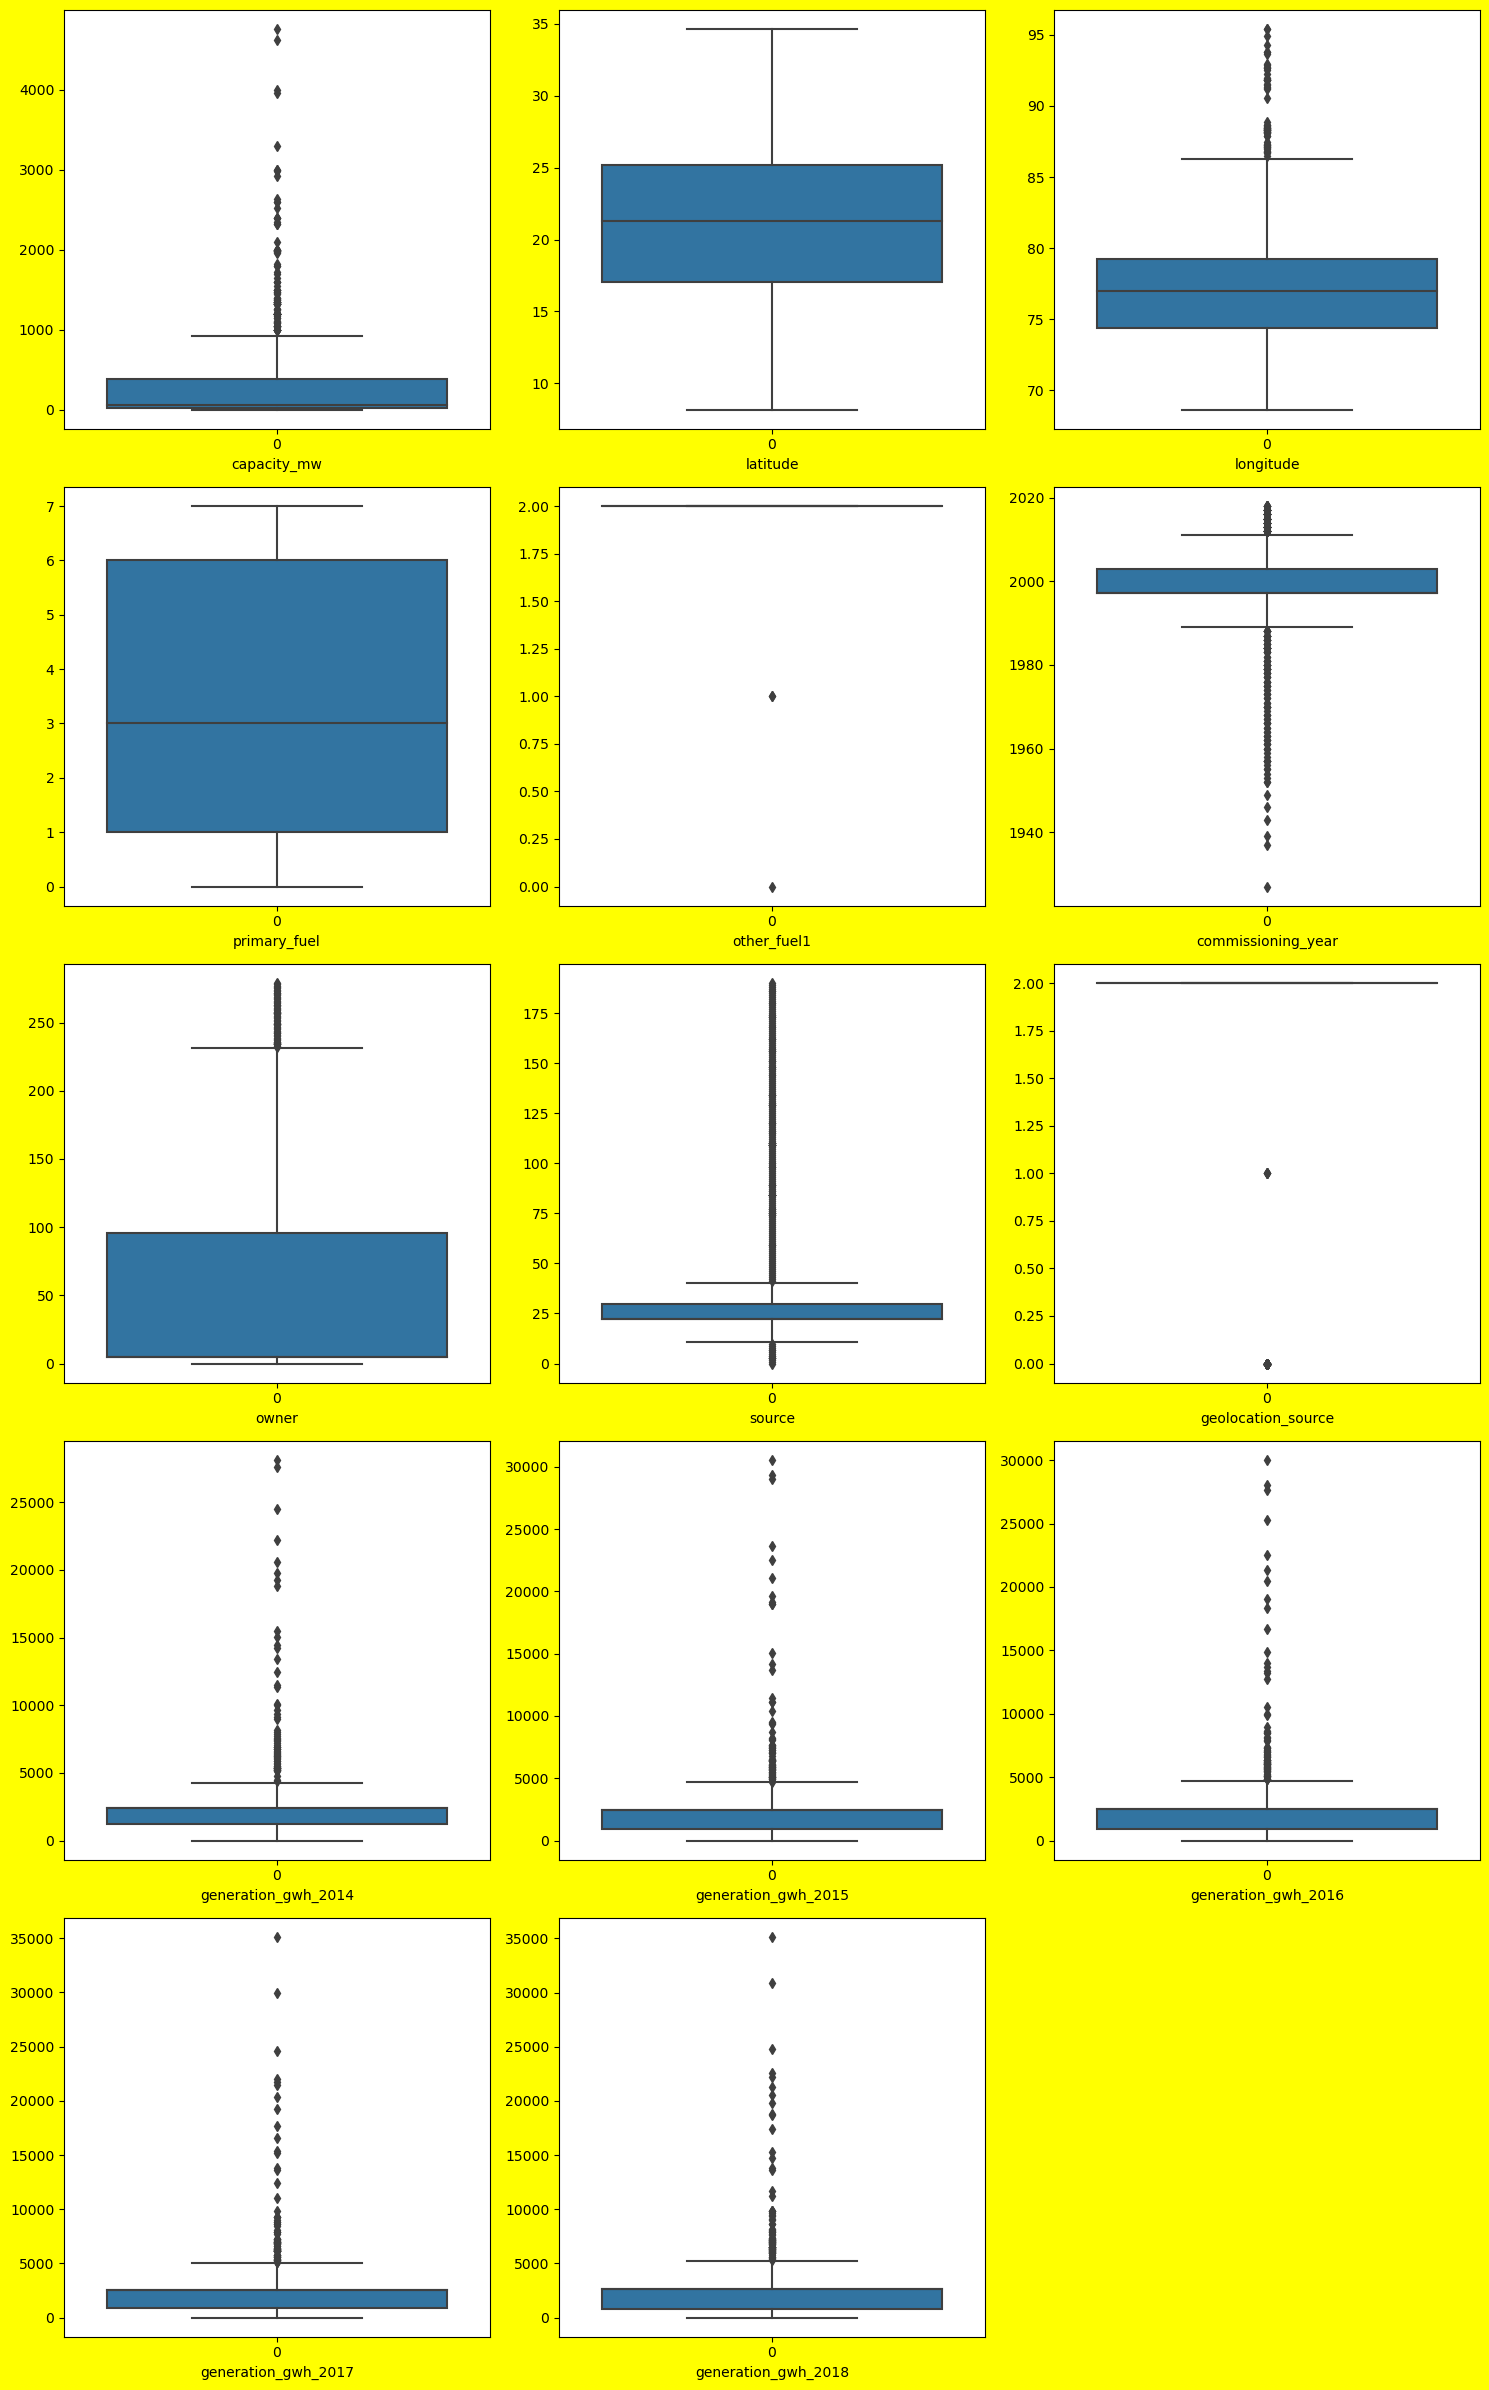

In [115]:
#Let's check for outliers
plt.figure(figsize=(15,24),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()


Except primary fuel and latitude all other variables have outliers. We will need to treat it at a later stage

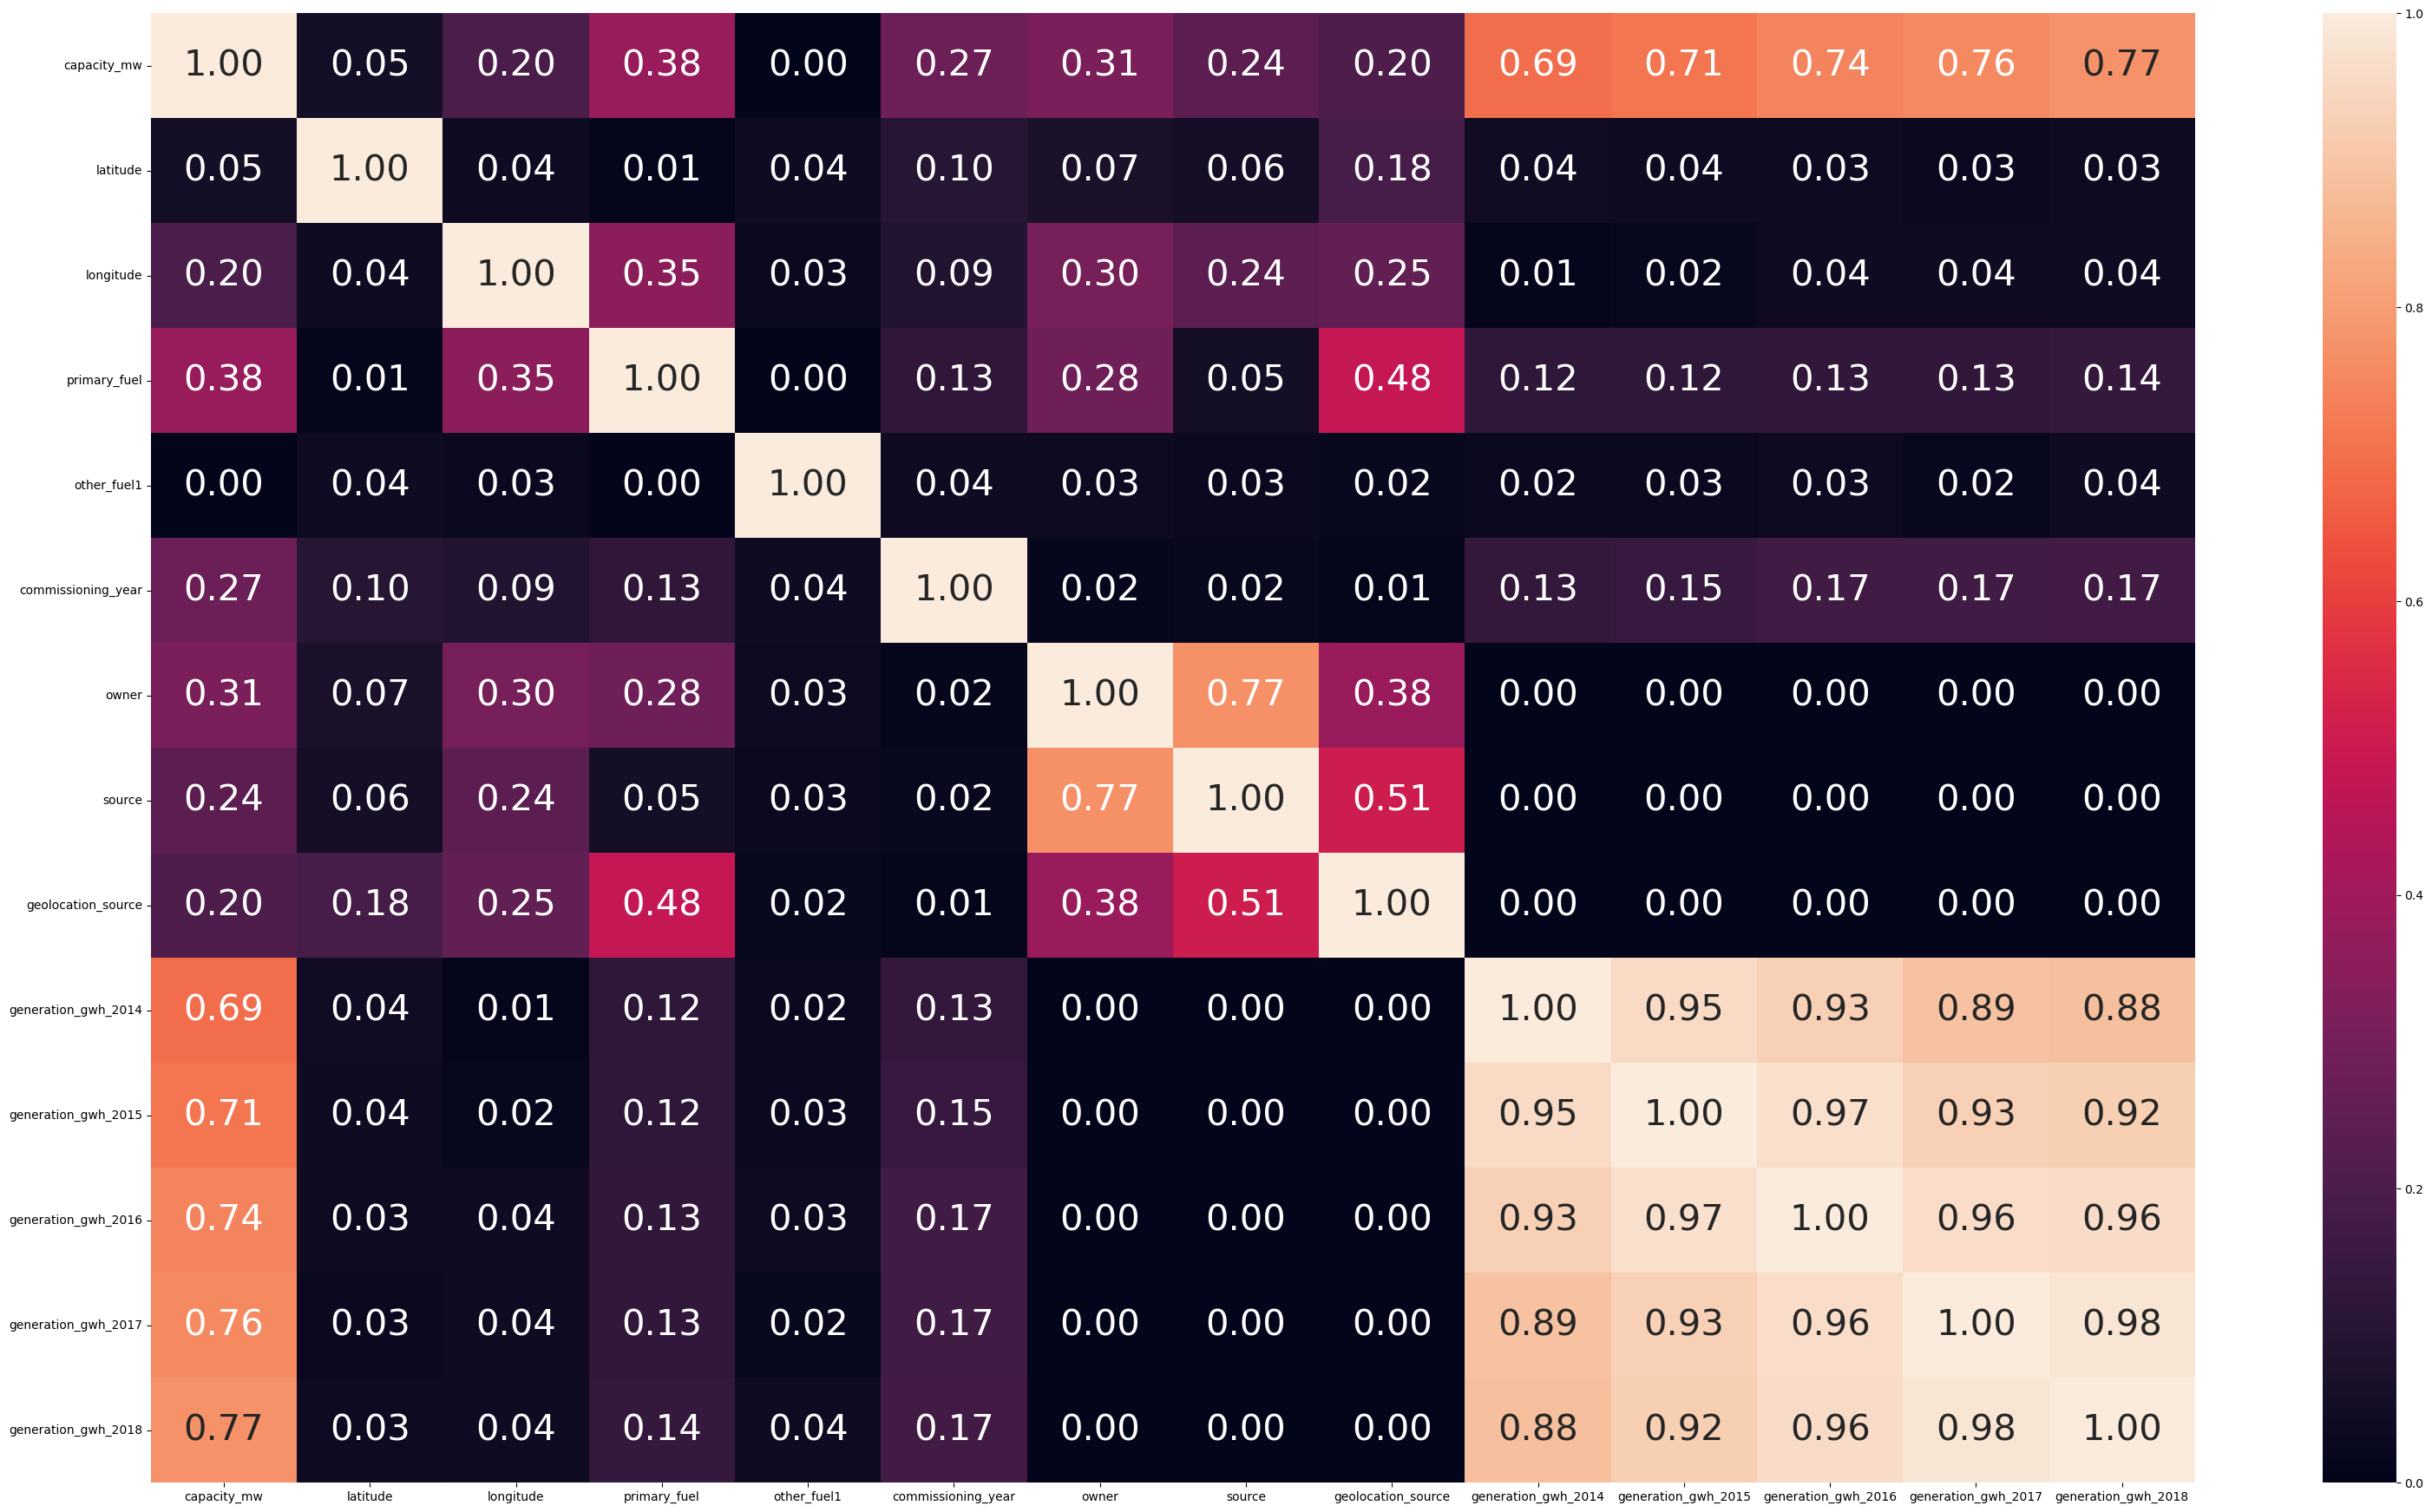

In [122]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(38,22))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':30})
plt.show()

1. generation_gwht_2014 is highly correlated with generation_gwht_2015, generation_gwht_2016, generation_gwht_2017 and generation_gwht_2018.

2. Similarly generation_gwht_2015 is highly correlated with generation_gwht_2014, generation_gwht_2016, generation_gwht_2017 and generation_gwht_2018.
Same goes for generation_gwht_2016, generation_gwht_2017 and generation_gwht_2018, they are highly correlated with electricity generation in gigawatt-hours reported for the remaining years.

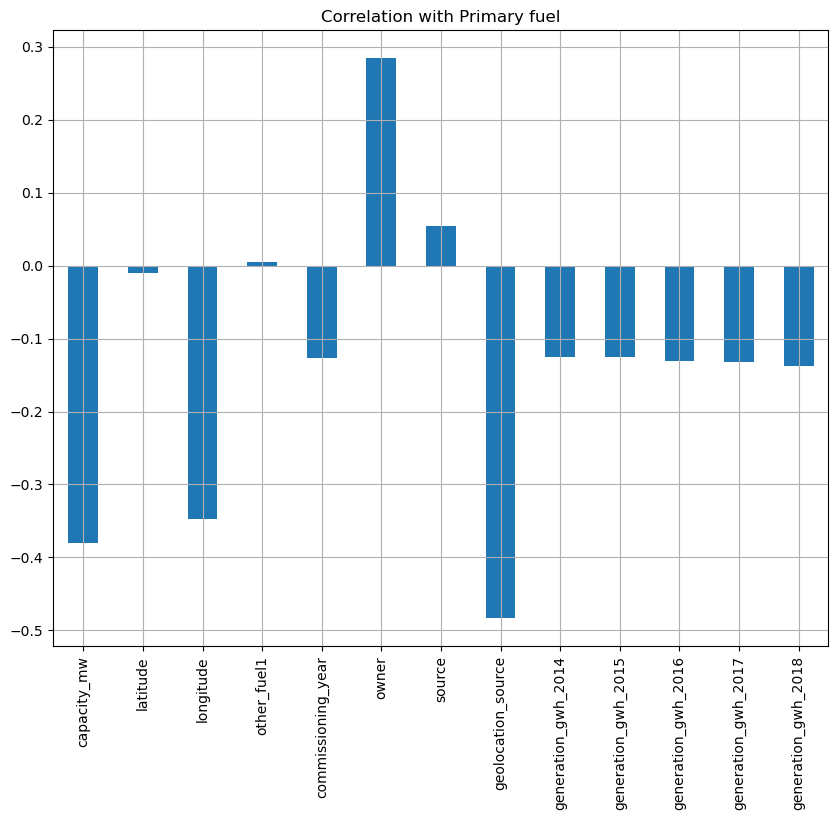

In [123]:
#Let's check the impact of each feature on the label(Primary fuel)
data.drop('primary_fuel', axis=1).corrwith(data.primary_fuel).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with Primary fuel')
plt.show()

In [125]:
data.corr()["primary_fuel"].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
other_fuel1            0.004912
source                 0.053613
owner                  0.284296
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

other_fuel1 seems to be least correlated with the label.

In [156]:
#Dropping more variables
data1=data.drop(columns=['other_fuel1','generation_gwh_2014','generation_gwh_2016'])

In [157]:
data1.shape

(907, 11)

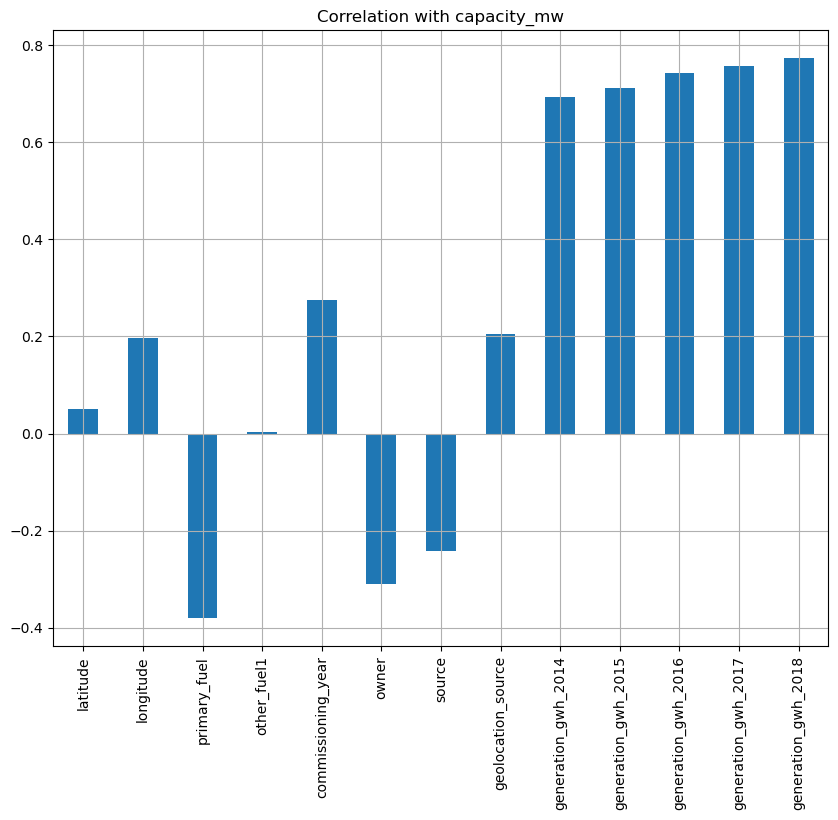

In [129]:
#Let's check the impact of each feature on the label
data.drop('capacity_mw', axis=1).corrwith(data.capacity_mw).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with capacity_mw')
plt.show()

In [130]:
data.corr()["capacity_mw"].sort_values()

primary_fuel          -0.380395
owner                 -0.311048
source                -0.242122
other_fuel1            0.003105
latitude               0.050984
longitude              0.195882
geolocation_source     0.204865
commissioning_year     0.274292
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

We have the same observation for the correlation of features with capacity_ms. Hence, dropping the same features would work

In [158]:
#Handling outliers
from scipy.stats import zscore


In [159]:
z=np.abs(zscore(data1))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3).all(axis=1)
data1=data1[filt_ent]

In [166]:
data1=data2

In [167]:
data2

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,229,109,1,2428.226946,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,258,174,2,2428.226946,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,2,21,2,2428.226946,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,5,22,2,843.747000,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,5,22,2,5916.370000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,5,22,2,0.994875,865.400000,686.500000
903,3.0,12.8932,78.1654,6,1997.091082,114,77,0,2428.226946,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,1997.091082,5,21,2,2428.226946,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,1997.091082,91,59,2,2428.226946,2547.759305,2600.804099


In [169]:
#Separating features and labels-
#For classification model-
X=data1.drop(columns=['primary_fuel'], axis=1)
y=data1['primary_fuel']

In [170]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [171]:
#For regression model
U=data2.drop(columns=['capacity_mw'], axis=1)
v=data2['capacity_mw']

In [172]:
v

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [175]:
#Scaling data
from sklearn.preprocessing import StandardScaler

In [176]:
scaler=StandardScaler()

In [177]:
X_scaled=scaler.fit_transform(X)

In [178]:
X_scaled

array([[-5.48907549e-01,  1.14980517e+00, -8.78279731e-01, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [-3.86977292e-01,  5.87310989e-01, -5.93788441e-01, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [-4.86678853e-01,  1.16179322e-01, -1.68239437e+00, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       ...,
       [-5.09908639e-01, -9.74706510e-01, -3.91673420e-01, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [-4.17498178e-01,  5.18793221e-01, -7.72866383e-01, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [-5.25169082e-01, -1.85383409e+00,  2.47270171e-03, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16]])

In [179]:
U_scaled=scaler.fit_transform(U)

In [180]:
U_scaled

array([[ 1.14980517e+00, -8.78279731e-01,  1.22568762e+00, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [ 5.87310989e-01, -5.93788441e-01, -9.67877242e-01, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [ 1.16179322e-01, -1.68239437e+00,  1.66440059e+00, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       ...,
       [-9.74706510e-01, -3.91673420e-01,  1.66440059e+00, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [ 5.18793221e-01, -7.72866383e-01, -9.67877242e-01, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16],
       [-1.85383409e+00,  2.47270171e-03,  1.66440059e+00, ...,
         0.00000000e+00,  3.11482392e-16,  1.50124402e-16]])

In [181]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split


In [186]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.30, random_state=10)

In [187]:
y_train

7      3
654    1
567    2
850    2
183    3
      ..
369    1
320    3
527    1
125    7
265    7
Name: primary_fuel, Length: 634, dtype: int32

In [188]:
U_train, U_test, v_train, v_test=train_test_split(U_scaled, v, test_size=0.30, random_state=44)

In [189]:
v_train

172     600.0
82       16.0
376      30.0
185      22.0
157     660.0
        ...  
571     920.0
173     280.0
753       1.5
419     126.0
788    2400.0
Name: capacity_mw, Length: 634, dtype: float64

Model Building

In [196]:
#Let's start with classification model first-
#Writing one function to call it for multiple models

def metric_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(X_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")

In [197]:
#Using K Neighbors Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [198]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [201]:
metric_score(knn,X_train, X_test, y_train, y_test, train=True)
metric_score(knn,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:85.80%

---------------Test Result-------------
Accuracy Score:76.19%


In [202]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [203]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.6736935282932266


 at 4, cross val score is 0.661553155822385


 at 5, cross val score is 0.6781009046202416




In [204]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [205]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [206]:
metric_score(rf,X_train, X_test, y_train, y_test, train=True)
metric_score(rf,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:81.68%


In [207]:
for k in range(3,6):
    cv_score=cross_val_score(rf,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8533502356858204


 at 4, cross val score is 0.8577930684963551


 at 5, cross val score is 0.8632809179770506




In [208]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [209]:
gbdt.fit(X_train,y_train)

GradientBoostingClassifier()

In [210]:
metric_score(gbdt,X_train, X_test, y_train, y_test, train=True)
metric_score(gbdt,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:82.78%


In [211]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8478460428824338


 at 4, cross val score is 0.8566917469104518


 at 5, cross val score is 0.8699046809544047




In [212]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [213]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [214]:
metric_score(xgb,X_train, X_test, y_train, y_test, train=True)
metric_score(xgb,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:82.05%


In [215]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8577871032136327


 at 4, cross val score is 0.8600005847725235


 at 5, cross val score is 0.8688179224090826




We are getting the best accuracy score 82.78% from Gradient Boosting Classifier model. The cross validation score at cv=5 is 86.9%.
Other model which is again performing well is XGBoost classifier model with accuracy score of 82.5% however, Gradient Boosting Classifier has a higher score.
We can conclude that Gradient Boosting Classifier model is the best fitted model as it works great on test data.

In [232]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [233]:
param_grid={'n_estimators': [20,50,100],
            'max_depth':[20,30,40],
            'max_leaf_nodes':[30,45,50],
            }

In [234]:
gridsearch=GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5)

In [235]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [20, 30, 40],
                         'max_leaf_nodes': [30, 45, 50],
                         'n_estimators': [20, 50, 100]})

In [236]:
gridsearch.best_params_

{'max_depth': 20, 'max_leaf_nodes': 30, 'n_estimators': 100}

In [237]:
Final_model=GradientBoostingClassifier(max_depth= 20,max_leaf_nodes=30,n_estimators=100)

In [238]:
Final_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=20, max_leaf_nodes=30)

In [240]:
pred=Final_model.predict(X_test)

In [241]:
acc=accuracy_score(y_test,pred)
print(acc*100)

82.78388278388277


After tuning the parameters, we are still getting 82.7% as accuracy score which implies that this is a generalized model that will work well on unseen data

In [242]:
#Predicting primary fuel
y_pred = Final_model.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'GBDT predicted': y_pred})

In [243]:
data1

,Actual,GBDT predicted
529,3,3
92,3,3
593,3,3
779,6,6
396,6,6
...,...,...
837,7,7
637,3,3
254,3,3
402,6,6


In [216]:
#Importing libraries for regression model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [217]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [218]:
reg.fit(U_train,v_train)


LinearRegression()

In [220]:
pred_train=reg.predict(U_train)
pred_test=reg.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train)}")
print(f" testing accuracy is {r2_score(v_test,pred_test)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.7323709920508301
 testing accuracy is 0.7905302897698276
Mean Absolute Error Score: 207.7522213410373


In [221]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(reg,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7180732892727746


 at 4, cross val score is 0.715069298960881


 at 5, cross val score is 0.7228512593949785




In [222]:
#Using Grandient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [223]:
gbr.fit(U_train,v_train)

GradientBoostingRegressor()

In [224]:
pred_train1=gbr.predict(U_train)
pred_test1=gbr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train1)}")
print(f" testing accuracy is {r2_score(v_test,pred_test1)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test1)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.9639744031127455
 testing accuracy is 0.8352178138031423
Mean Absolute Error Score: 117.65537439570348


In [225]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(gbr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8378463908630488


 at 4, cross val score is 0.8324606972910213


 at 5, cross val score is 0.8363060351829101




In [226]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [227]:
rfr.fit(U_train,v_train)

RandomForestRegressor()

In [228]:
pred_train2=rfr.predict(U_train)
pred_test2=rfr.predict(U_test)
print(f" training accuracy is {r2_score(v_train,pred_train2)}")
print(f" testing accuracy is {r2_score(v_test,pred_test2)}")
mean_score = metrics.mean_absolute_error(v_test,pred_test2)
print("Mean Absolute Error Score:",mean_score)

 training accuracy is 0.977856790970425
 testing accuracy is 0.866602525287903
Mean Absolute Error Score: 109.30090952817022


In [229]:
#Checking cross validation score to ensure model isn't overfitting-
for k in range(3,6):
    cv_score=cross_val_score(rfr,U,v,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8588995695844082


 at 4, cross val score is 0.8485859397221158


 at 5, cross val score is 0.8518085599062811




We can see that Random Forest Regressor model works best on test data and Mean absolute score is the lowest. We are getting r2 score of 86.6% with this model and Mean Absolute Error score of 109. At CV=5, we are getting 85% accuracy when actual test score is 86.6% and MAE is 109. Also, Gradient Boosting Regressor is performing well with 83.5% r2-score however, it is lower than Random Forest Regressor. Hence, Random Forest Regressor model seems to be the best model and we will move ahead with this.

In [287]:
y_pred1 = rfr.predict(U_test)
data2 = pd.DataFrame({'Actual' : v_test, 'RFR predicted': y_pred1})

In [288]:
data2

,Actual,RFR predicted
758,10.0,35.622000
78,1379.0,1077.532400
212,310.0,441.475510
886,21.0,78.265512
629,45.0,45.679000
...,...,...
404,25.0,44.004400
208,75.0,78.265512
44,1050.0,1279.300000
557,150.0,23.321000
